# SHARK ATTACKS 🕵️‍♂️

## Cleansing Data

In [1]:
# importing 
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
#calling the csv
df = pd.read_csv("../data/attacks.csv", encoding= "unicode_escape")

In [4]:
# changing values to be able to see all the columns
pd.set_option('display.max_columns', None)


In [5]:
#cheking all the null values
df.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [6]:
#first print to take ideas to clean de csv
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# we drop all de rows that have full null values
df = df.dropna(how='all')

In [8]:
# same to see more in detail a row
df.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5634,1895.08.02,2-Aug-1895,1895.0,Unprovoked,USA,New Jersey,Raritan Bay,Fishing,Elias Turner,M,NaN,Arm bitten,N,NaN,NaN,"Boston Globe, 8/3/1895, p.5",1895.08.02-Turner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1895.08.02,1895.08.02,669.0,NaN,NaN


In [9]:
#Delete all colums that we will not use
df = df.drop(["Country","Area","Location","Injury","Time","Type","Unnamed: 22","Unnamed: 23","Investigator or Source", "pdf", "href formula", "href", "Case Number.1","Name", "Case Number.2", "original order"], axis = 1)
#shape check 
df.shape

(8703, 8)

In [10]:
# droping all columns that have less than 6 good values
df1 = df.dropna(thresh=6)

In [11]:
df1.shape

(5743, 8)

In [12]:
# looking for the ramaining nan values
df1.isna().sum()

Case Number       0
Date              0
Year              1
Activity        182
Sex             227
Age            2279
Fatal (Y/N)     399
Species        2437
dtype: int64

In [13]:
#change type of year column to float
df1['Year'] = df['Year'].astype(float)

/var/folders/b0/dq4wb7ld55l9pqp5_v7jcgmc0000gn/T/ipykernel_6060/2473679706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = df['Year'].astype(float)


In [14]:
# changing de .0 in years to a int value
df1["Year"].replace(to_replace= 0.0, value= pd.NA, inplace=True)

/var/folders/b0/dq4wb7ld55l9pqp5_v7jcgmc0000gn/T/ipykernel_6060/3870424000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Year"].replace(to_replace= 0.0, value= pd.NA, inplace=True)


In [15]:
#Checking all the values we have in "Fatal (Y/N)"
df1 = df1.dropna(subset=['Fatal (Y/N)'])
df1['Fatal (Y/N)'].value_counts()

N          4044
Y          1256
UNKNOWN      34
 N            7
M             1
2017          1
y             1
Name: Fatal (Y/N), dtype: int64

In [16]:
# Turning all values in Fatal colum in yes,no or uknown
df1["Fatal (Y/N)"] = df1["Fatal (Y/N)"].apply(lambda x: x.strip())
df1["Fatal (Y/N)"] = df1["Fatal (Y/N)"].replace("y","Y")
df1["Fatal (Y/N)"] = df1["Fatal (Y/N)"].replace("M","UNKNOWN")
df1["Fatal (Y/N)"] = df1["Fatal (Y/N)"].replace("2017","UNKNOWN")


#check new value list
df1['Fatal (Y/N)'].value_counts()

N          4051
Y          1257
UNKNOWN      36
Name: Fatal (Y/N), dtype: int64

In [17]:
# check date colum values
df1["Date"].value_counts()

1957           9
1950           7
1942           7
No date        6
1956           5
              ..
24-Jun-1997    1
15-Jun-1997    1
09-Jun-1997    1
07-Jun-1997    1
1845-1853      1
Name: Date, Length: 4658, dtype: int64

In [18]:
#standardizing Date format to dd/mm/yyyy
new_dformat = df1["Date"]
new_dformat = new_dformat.str.replace("-", "/")
new_dformat = new_dformat.str.replace('--','/')
new_dformat = new_dformat.str.replace(' ','/')
new_dformat = new_dformat.str.replace('Jan','01')
new_dformat = new_dformat.str.replace('Feb','02')
new_dformat = new_dformat.str.replace('Mar','03')
new_dformat = new_dformat.str.replace('Apr','04')
new_dformat = new_dformat.str.replace('May','05')
new_dformat = new_dformat.str.replace('Jun','06')
new_dformat = new_dformat.str.replace('Jul','07')
new_dformat = new_dformat.str.replace('Aug','08')
new_dformat = new_dformat.str.replace('Sep','09')
new_dformat = new_dformat.str.replace('Oct','10')
new_dformat = new_dformat.str.replace('Nov','11')
new_dformat = new_dformat.str.replace('Dec','12')
new_dformat = new_dformat.str.replace('Reported','')
df1["Date"] = new_dformat
# cheking to see the changes
df1

,Case Number,Date,Year,Activity,Sex,Age,Fatal (Y/N),Species
0,2018.06.25,25/06/2018,2018.0,Paddling,F,57,N,White shark
1,2018.06.18,18/06/2018,2018.0,Standing,F,11,N,NaN
2,2018.06.09,09/06/2018,2018.0,Surfing,M,48,N,NaN
3,2018.06.08,08/06/2018,2018.0,Surfing,M,NaN,N,2 m shark
4,2018.06.04,04/06/2018,2018.0,Free diving,M,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...
6296,ND.0006,Before/1906,<NA>,Swimming,M,NaN,Y,Said to involve a grey nurse shark that leapt ...
6297,ND.0005,Before/1903,<NA>,Diving,M,NaN,Y,NaN
6298,ND.0004,Before/1903,<NA>,Pearl diving,M,NaN,Y,NaN
6299,ND.0003,1900/1905,<NA>,Swimming,M,NaN,Y,NaN


In [19]:
#chekig again values
df1["Date"].value_counts()

1957          9
1950          7
1942          7
No/date       6
1956          5
             ..
24/06/1997    1
15/06/1997    1
09/06/1997    1
07/06/1997    1
1845/1853     1
Name: Date, Length: 4658, dtype: int64

In [20]:
#create a new column to save the values of month, extracted from the case number. 
df1['Month'] = df1['Case Number'].str.extract('(\.\d{2}\.)')
df1['Month'] = df1['Month'].str.extract('(\d{2})')
df1.Month = df1.Month.fillna(0).astype('int')



In [21]:
df1

,Case Number,Date,Year,Activity,Sex,Age,Fatal (Y/N),Species,Month
0,2018.06.25,25/06/2018,2018.0,Paddling,F,57,N,White shark,6
1,2018.06.18,18/06/2018,2018.0,Standing,F,11,N,NaN,6
2,2018.06.09,09/06/2018,2018.0,Surfing,M,48,N,NaN,6
3,2018.06.08,08/06/2018,2018.0,Surfing,M,NaN,N,2 m shark,6
4,2018.06.04,04/06/2018,2018.0,Free diving,M,NaN,N,"Tiger shark, 3m",6
...,...,...,...,...,...,...,...,...,...
6296,ND.0006,Before/1906,<NA>,Swimming,M,NaN,Y,Said to involve a grey nurse shark that leapt ...,0
6297,ND.0005,Before/1903,<NA>,Diving,M,NaN,Y,NaN,0
6298,ND.0004,Before/1903,<NA>,Pearl diving,M,NaN,Y,NaN,0
6299,ND.0003,1900/1905,<NA>,Swimming,M,NaN,Y,NaN,0


In [22]:
#filling missing years
df1["Year"] = df1["Year"].fillna(0).astype(int)
df1

,Case Number,Date,Year,Activity,Sex,Age,Fatal (Y/N),Species,Month
0,2018.06.25,25/06/2018,2018,Paddling,F,57,N,White shark,6
1,2018.06.18,18/06/2018,2018,Standing,F,11,N,NaN,6
2,2018.06.09,09/06/2018,2018,Surfing,M,48,N,NaN,6
3,2018.06.08,08/06/2018,2018,Surfing,M,NaN,N,2 m shark,6
4,2018.06.04,04/06/2018,2018,Free diving,M,NaN,N,"Tiger shark, 3m",6
...,...,...,...,...,...,...,...,...,...
6296,ND.0006,Before/1906,0,Swimming,M,NaN,Y,Said to involve a grey nurse shark that leapt ...,0
6297,ND.0005,Before/1903,0,Diving,M,NaN,Y,NaN,0
6298,ND.0004,Before/1903,0,Pearl diving,M,NaN,Y,NaN,0
6299,ND.0003,1900/1905,0,Swimming,M,NaN,Y,NaN,0


In [23]:
# check value for Age 
df1["Age"].value_counts()

18                143
17                140
15                137
16                136
19                136
                 ... 
 28                 1
7      &    31      1
 30                 1
mid-30s             1
13 or 14            1
Name: Age, Length: 147, dtype: int64

In [24]:
# now we will fix the age colum
age_fix = df1["Age"].value_counts()

#Creating and empty list
age_list = []
#looping
for i in df1["Age"]:
    try:
        age_list.append(re.search("\d+", i))
    except TypeError:
        age_list.append(np.nan)

df1["New_Age"] = age_list

age_list2 = []
for i in df1["New_Age"]:
    try:
        age_list2.append(i.group())
    except AttributeError:
        age_list2.append(np.nan)
df1["New_Age"] = age_list2     

In [25]:
df1["New_Age"].value_counts()

18    146
17    142
20    140
15    137
19    136
     ... 
87      1
84      1
86      1
72      1
2       1
Name: New_Age, Length: 80, dtype: int64

In [26]:
# droping more columns
df1 = df1.drop(["Age","Case Number"] , axis = 1)

In [27]:
# cheking remaining columns 
df1.columns

Index(['Date', 'Year', 'Activity', 'Sex ', 'Fatal (Y/N)', 'Species ', 'Month',
       'New_Age'],
      dtype='object')

In [28]:
#check shape
df1.shape

(5344, 8)

In [29]:
df1["Species "].value_counts()

White shark                                                                                                                      159
Tiger shark                                                                                                                       73
Bull shark                                                                                                                        51
4' shark                                                                                                                          40
6' shark                                                                                                                          39
                                                                                                                                ... 
White shark, 2.7 m to 3 m [9' to 10']                                                                                              1
1.2 m to 1.5 m [4.5' to 5'] shark                                    

In [30]:
df1['Species2'] =df1["Species "].str.extract('([A-Z|a-z]{1,}\s{1}shark)')
df1["Species2"]= df1["Species2"].str.upper()

In [31]:
df1["Species2"].value_counts()

WHITE SHARK     618
TIGER SHARK     258
BULL SHARK      174
M SHARK         135
NURSE SHARK      96
               ... 
FEMALE SHARK      1
GAFFED SHARK      1
GRAY SHARK        1
FOR SHARK         1
TIPPED SHARK      1
Name: Species2, Length: 88, dtype: int64

In [32]:
#looking for more missing values
df1.isna().sum()

Date              0
Year              0
Activity        151
Sex             225
Fatal (Y/N)       0
Species        2430
Month             0
New_Age        2135
Species2       3223
dtype: int64

In [33]:
df1

,Date,Year,Activity,Sex,Fatal (Y/N),Species,Month,New_Age,Species2
0,25/06/2018,2018,Paddling,F,N,White shark,6,57,WHITE SHARK
1,18/06/2018,2018,Standing,F,N,NaN,6,11,NaN
2,09/06/2018,2018,Surfing,M,N,NaN,6,48,NaN
3,08/06/2018,2018,Surfing,M,N,2 m shark,6,NaN,M SHARK
4,04/06/2018,2018,Free diving,M,N,"Tiger shark, 3m",6,NaN,TIGER SHARK
...,...,...,...,...,...,...,...,...,...
6296,Before/1906,0,Swimming,M,Y,Said to involve a grey nurse shark that leapt ...,0,NaN,NURSE SHARK
6297,Before/1903,0,Diving,M,Y,NaN,0,NaN,NaN
6298,Before/1903,0,Pearl diving,M,Y,NaN,0,NaN,NaN
6299,1900/1905,0,Swimming,M,Y,NaN,0,NaN,NaN


In [34]:
# reset the index after cleansing the data
df1.reset_index(drop=True, inplace=True)

In [35]:
df1 = df1.drop(["Species "] , axis = 1)

In [36]:
#final check after cleaning the dataset
df1

,Date,Year,Activity,Sex,Fatal (Y/N),Month,New_Age,Species2
0,25/06/2018,2018,Paddling,F,N,6,57,WHITE SHARK
1,18/06/2018,2018,Standing,F,N,6,11,NaN
2,09/06/2018,2018,Surfing,M,N,6,48,NaN
3,08/06/2018,2018,Surfing,M,N,6,NaN,M SHARK
4,04/06/2018,2018,Free diving,M,N,6,NaN,TIGER SHARK
...,...,...,...,...,...,...,...,...
5339,Before/1906,0,Swimming,M,Y,0,NaN,NURSE SHARK
5340,Before/1903,0,Diving,M,Y,0,NaN,NaN
5341,Before/1903,0,Pearl diving,M,Y,0,NaN,NaN
5342,1900/1905,0,Swimming,M,Y,0,NaN,NaN


In [37]:
#making age int
df1["New_Age"] = df1["New_Age"].astype("Int64")

In [38]:
df1.New_Age

0         57
1         11
2         48
3       <NA>
4       <NA>
        ... 
5339    <NA>
5340    <NA>
5341    <NA>
5342    <NA>
5343      15
Name: New_Age, Length: 5344, dtype: Int64

## VISUALIZATION

In [39]:
df1.groupby("Year")["Month"].count()

Year
0       104
77        1
1543      1
1554      1
1555      1
       ... 
2014    116
2015    130
2016    118
2017    121
2018     52
Name: Month, Length: 226, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Count'>

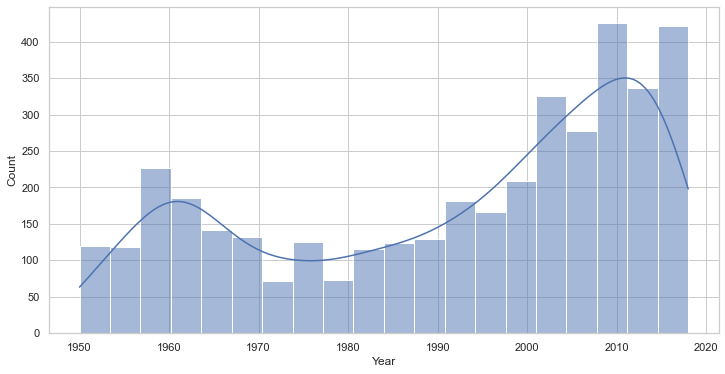

In [45]:
sns.histplot(x=df1[df1.Year >= 1950].Year, bins = 20, kde=True)


<AxesSubplot:xlabel='Year', ylabel='Count'>

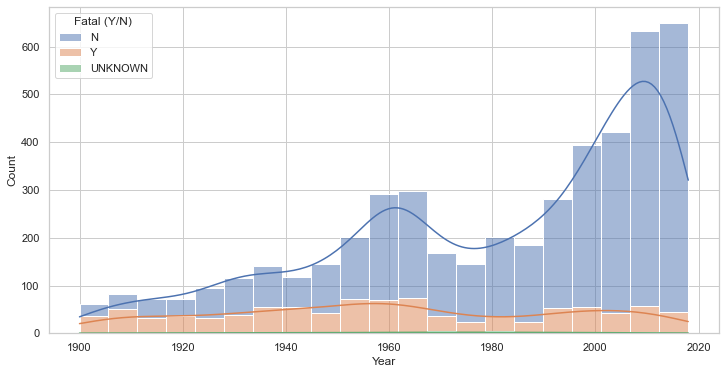

In [90]:
#seen the difference between the Fatal and non fatal cases in shark attacks
sns.histplot(data=df1, x=df1[df1.Year >= 1900].Year, hue="Fatal (Y/N)", multiple="stack",kde=True)

<AxesSubplot:xlabel='Year', ylabel='count'>

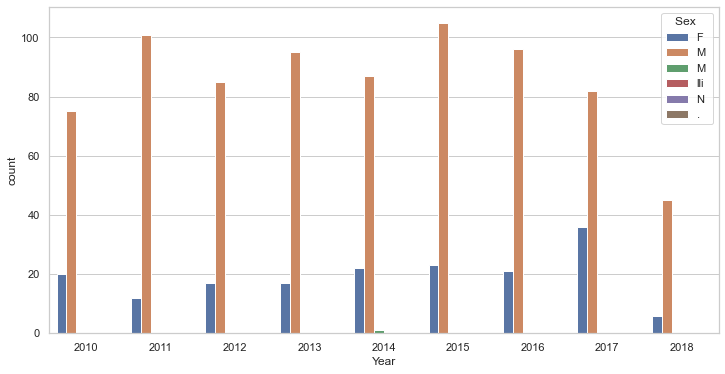

In [91]:
# Checking during years ratio of Female and Male attacked by sharks
sns.countplot(x=df1[df1.Year >= 2010].Year, hue=df1["Sex "])

<AxesSubplot:xlabel='Sex ', ylabel='count'>

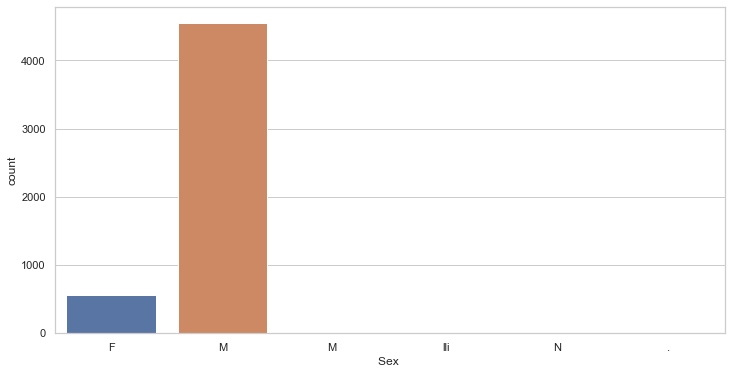

In [92]:
#comparation between genders in shark attacks
sns.countplot(x=df1["Sex "])

<AxesSubplot:xlabel='New_Age', ylabel='Count'>

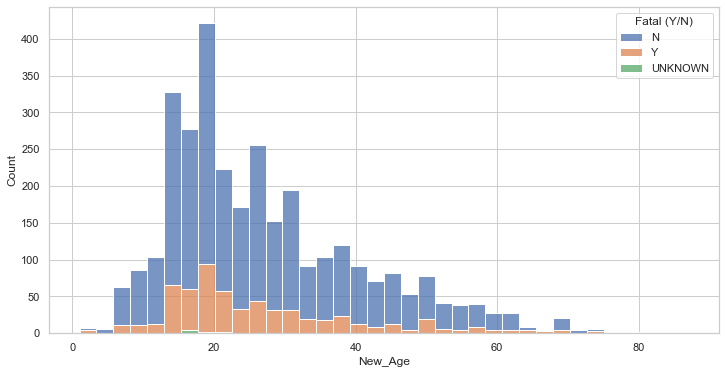

In [93]:
#Cheking the median Age in shark attacks and if age is related to mortality in shark attacks and
sns.histplot(data=df1, x=df1.New_Age, hue="Fatal (Y/N)", multiple="stack")

In [96]:
# filling na with values to be able to show graphics
df1 = df1.fillna(np.nan).replace([np.nan],[None])

In [106]:
#Cheking the median Age in shark attacks and if age is related to mortality in shark attacks and
fig = px.box(df1, x="Fatal (Y/N)", y="New_Age")
fig.show()

In [99]:
age_sorted = df1[df1.groupby("Year").Year.transform("count") > 2000].copy()

In [100]:
df1.dtypes

Date           object
Year            int64
Activity       object
Sex            object
Fatal (Y/N)    object
Month           int64
New_Age        object
Species2       object
dtype: object

<AxesSubplot:xlabel='Month', ylabel='Count'>

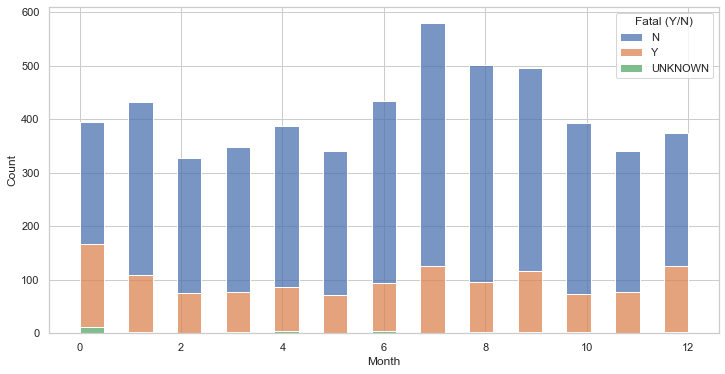

In [101]:
#checking the months with the most attacks and the percentage of lethal and non-lethal
sns.histplot(data=df1, x=df1.Month, hue=df1["Fatal (Y/N)"], multiple="stack", bins=25)

<AxesSubplot:xlabel='Species2', ylabel='Count'>

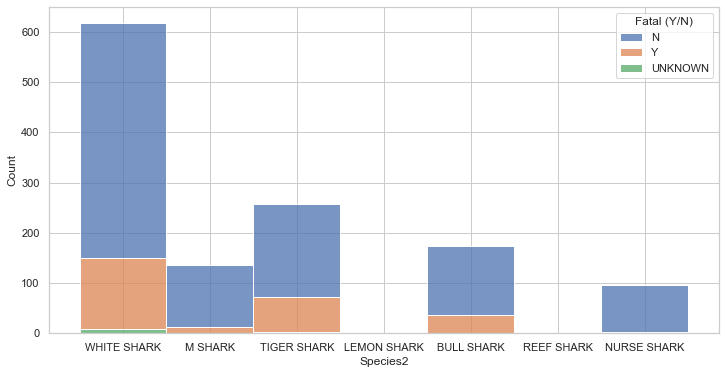

In [102]:
sharks_sort= df1[df1.groupby('Species2').Species2.transform('count') >80].copy()
sns.histplot(data=sharks_sort, x=df1.Species2, hue="Fatal (Y/N)", multiple="stack")

In [103]:
# summer vacations months have more shark attacks probably due people traveling and going to beach 
#fatality seems more or less constant
#Ages with more risk to suffer shark attacks is young people between 17 and 35 years probably because the do more actuatic activitys or frequent the sea more 
# Males have higher cases of shark attacks than females